## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.
    
IV: EnergyC, MC, ComfNS, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#table(survey$HomeSYN)
#print(sum(survey$HomeSYN==1))
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

print(dim(data1))

[1] 662 111


In [2]:
library("xtable")
#Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, Attitude, PBC, SubNorm
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'PBC', 
              'SubNorm','Attitude')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));
#the regression for IncHomeS

data2 = data1[,which(names(data1) %in% c("IncHomeS", IndepPred)) ]
a=dim(data2);
data2 = na.omit(data2)
b=dim(data2);
print (c(a[1]-b[1], " rows dropped"));
#For reference, exact values
#write.csv(data2,"dr2")
#names(s1) = c("ID","IncHomeS","Age","Income","Educ","OwnRent","SqftCate","Attitude",
#              "SubNorm","PBC","EnergyC","MC","ComfNS","HabitC")
#nn = c("IncHomeS","Age","OwnRent","SqftCate","Income","Educ","EnergyC","Attitude","PBC","MC","ComfNS","SubNorm","HabitC");
mod = lm(fmla,data=data2)
smod = summary(mod)
tbl = xtable(smod$coefficients, caption=paste(c("N=",b[1]," Adj-R2=",round(smod$adj.r.squared,2)),collapse=""))
tbl
print(tbl, type = "html")

[1] "18"            " rows dropped"


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.63981,0.6704,5.43,8.1e-08
Age,0.02365,0.0065,3.62,3.2e-04
Income,-0.02400,0.0389,-0.62,5.4e-01
Educ,0.02622,0.0643,0.41,6.8e-01
OwnRent,0.09553,0.1543,0.62,5.4e-01
SqftCate,-0.05561,0.0719,-0.77,4.4e-01
EnergyC,0.00059,0.0594,0.01,9.9e-01
MC,-0.03220,0.0701,-0.46,6.5e-01
ComfNS,0.32766,0.0480,6.83,2.0e-11
HabitC,-0.09238,0.0512,-1.80,7.2e-02


<!-- html table generated in R 3.4.1 by xtable 1.8-2 package -->
<!-- Fri Oct 27 12:55:20 2017 -->
<table border=1>
<caption align="bottom"> N=644 Adj-R2=0.11 </caption>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th> <th> t value </th> <th> Pr(&gt;|t|) </th>  </tr>
  <tr> <td align="right"> (Intercept) </td> <td align="right"> 3.64 </td> <td align="right"> 0.67 </td> <td align="right"> 5.43 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Age </td> <td align="right"> 0.02 </td> <td align="right"> 0.01 </td> <td align="right"> 3.62 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Income </td> <td align="right"> -0.02 </td> <td align="right"> 0.04 </td> <td align="right"> -0.62 </td> <td align="right"> 0.54 </td> </tr>
  <tr> <td align="right"> Educ </td> <td align="right"> 0.03 </td> <td align="right"> 0.06 </td> <td align="right"> 0.41 </td> <td align="right"> 0.68 </td> </tr>
  <tr> <td align="right"> OwnRent </td> <td align="right"> 0

Age   Income     Educ  OwnRent SqftCate  EnergyC       MC   ComfNS 
     1.2      1.3      1.1      1.4      1.4      1.6      1.3      1.1 
  HabitC      PBC  SubNorm Attitude 
     1.2      1.2      1.2      1.7

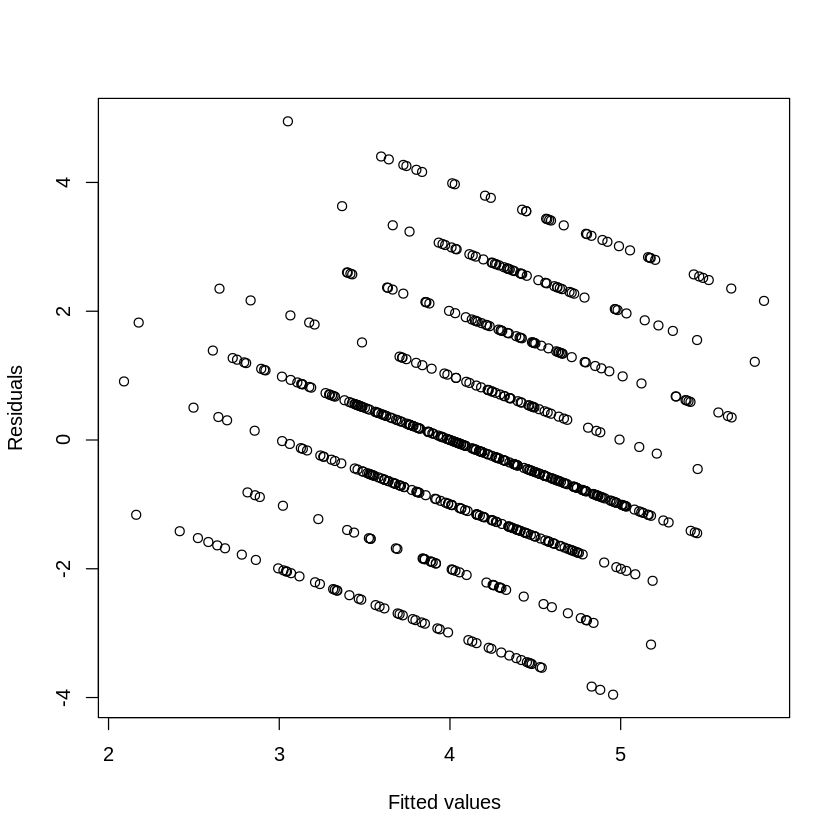

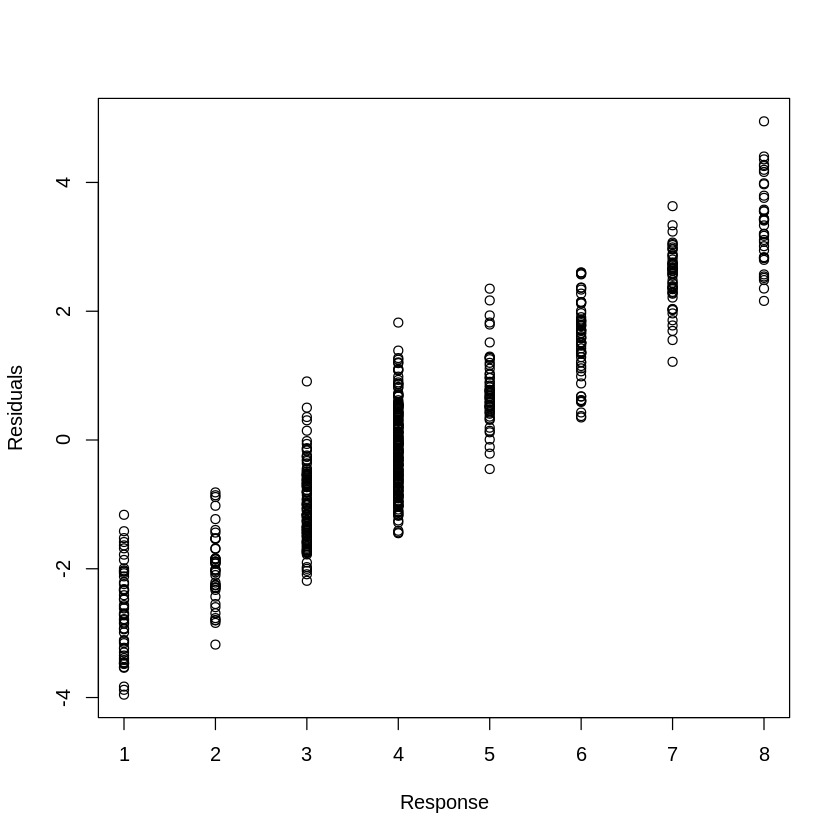

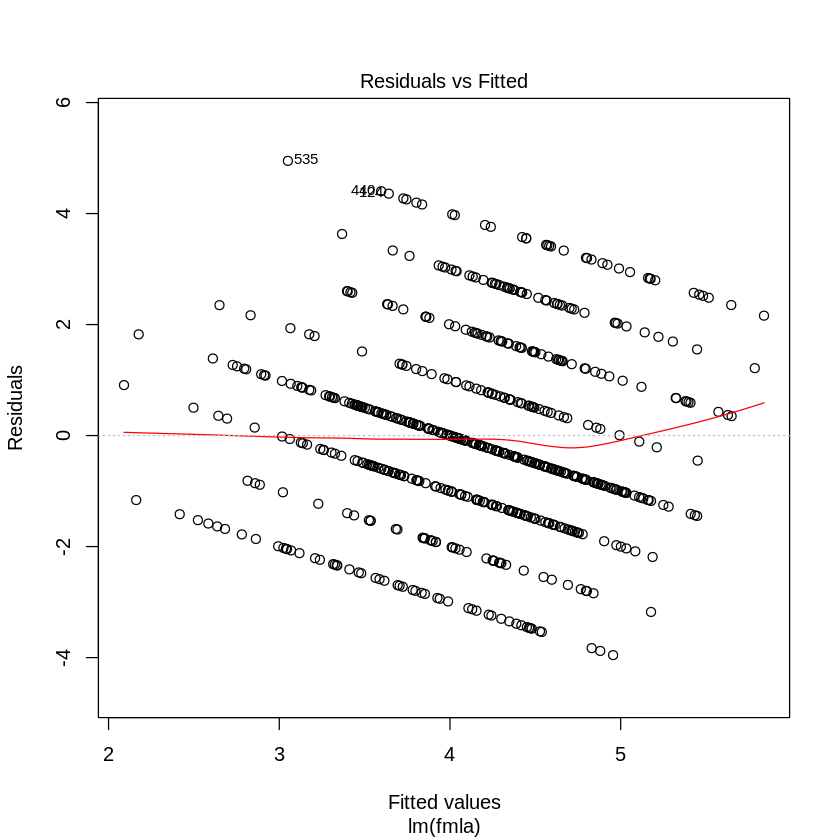

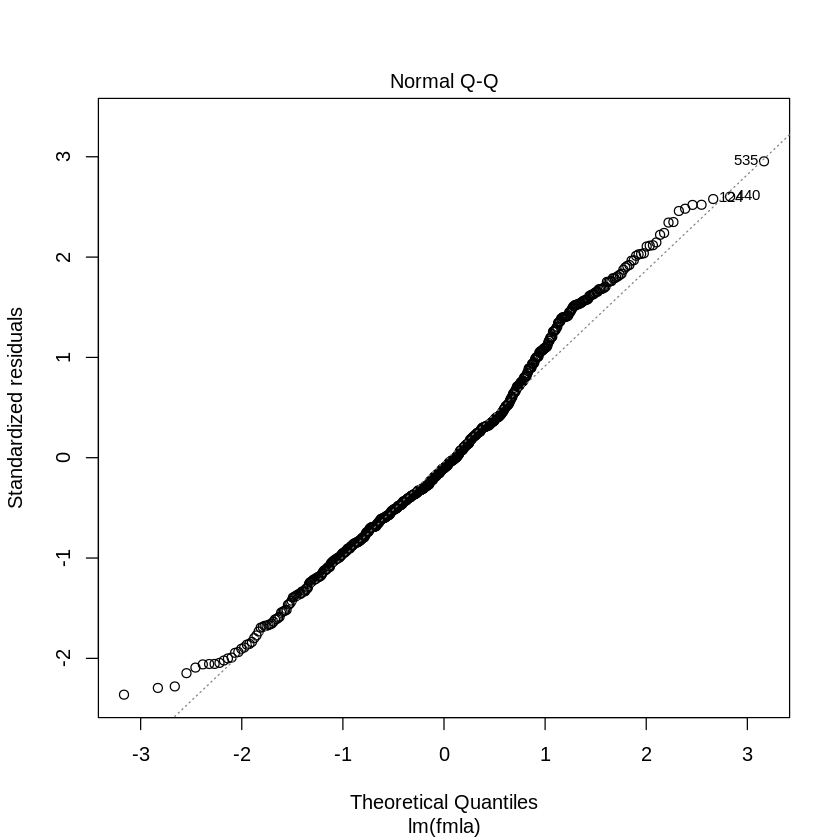

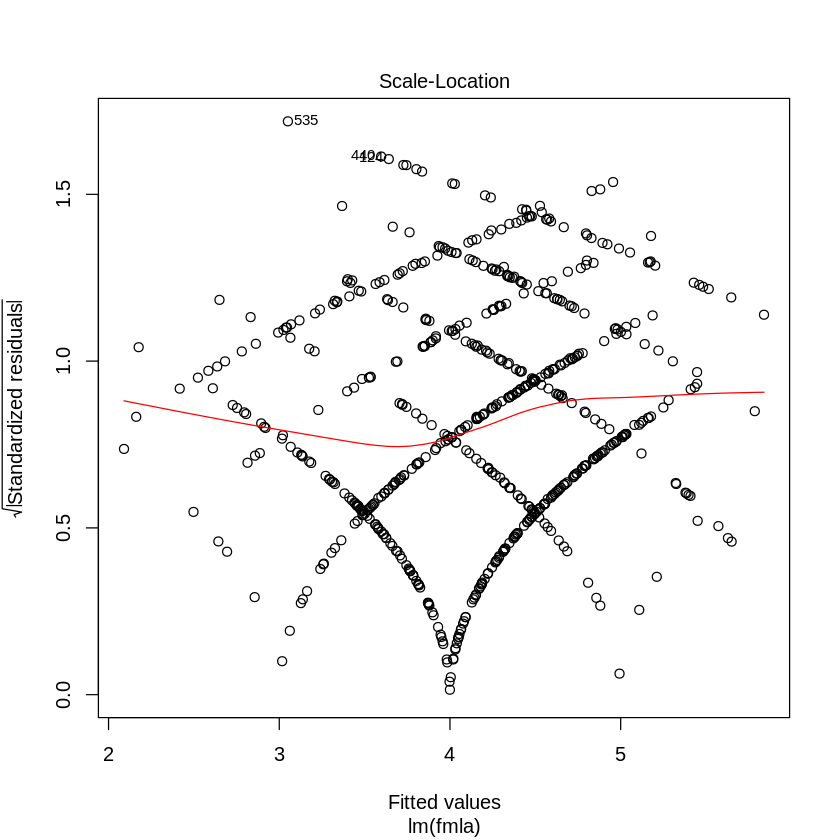

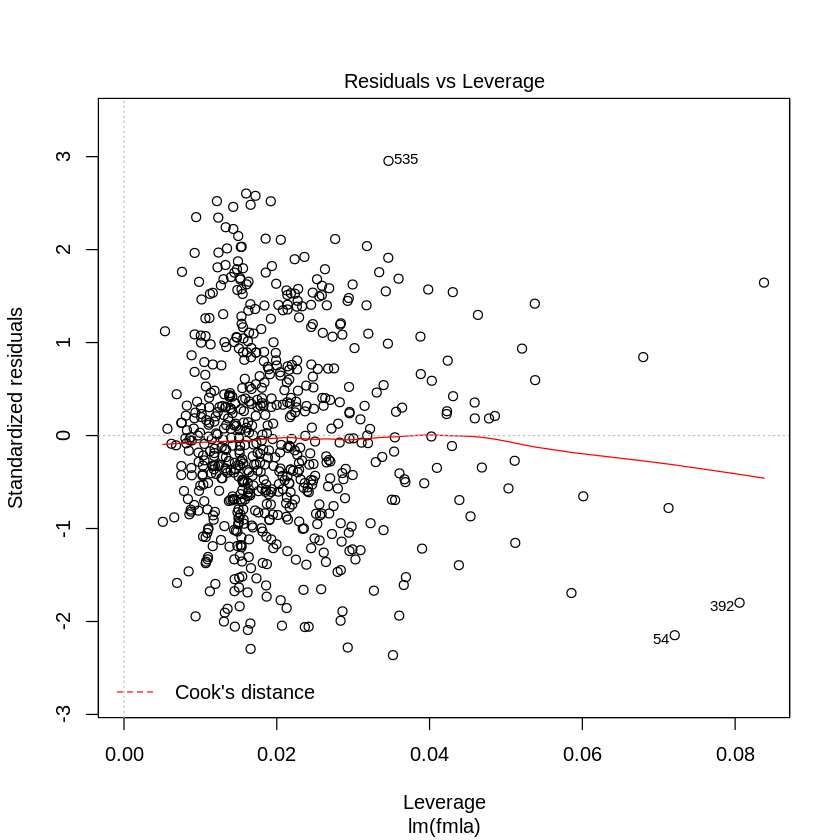

In [30]:
#Diagnostics
library(car)
vif(mod)
plot(mod$fitted.values,mod$residuals, xlab="Fitted values", ylab="Residuals")    
plot(data2$IncHomeS,mod$residuals, xlab="Response", ylab="Residuals")

plot(mod)

In [33]:
#are results the same excluding extreme responses?
subset = data2$IncHomeS!=1 & data2$IncHomeS!=8
mod1 = lm(fmla,data=data2, subs=subset)
smod1 = summary(mod1)
tbl1 = xtable(smod1$coefficients, caption=paste(c("N=",sum(subset)," Adj-R2=",round(smod1$adj.r.squared,2)),collapse=""))
tbl1
print(tbl1, type = "html")

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.8962,0.5647,6.900,1.5e-11
Age,0.0188,0.0056,3.365,8.2e-04
Income,-0.0497,0.0330,-1.505,1.3e-01
Educ,0.0106,0.0534,0.198,8.4e-01
OwnRent,0.1190,0.1320,0.902,3.7e-01
SqftCate,-0.0749,0.0607,-1.234,2.2e-01
EnergyC,-0.0087,0.0490,-0.177,8.6e-01
MC,0.0040,0.0601,0.067,9.5e-01
ComfNS,0.1734,0.0418,4.148,3.9e-05
HabitC,-0.0282,0.0435,-0.647,5.2e-01


<!-- html table generated in R 3.4.1 by xtable 1.8-2 package -->
<!-- Mon Oct 23 16:25:17 2017 -->
<table border=1>
<caption align="bottom"> N=554 Adj-R2=0.05 </caption>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th> <th> t value </th> <th> Pr(&gt;|t|) </th>  </tr>
  <tr> <td align="right"> (Intercept) </td> <td align="right"> 3.90 </td> <td align="right"> 0.56 </td> <td align="right"> 6.90 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Age </td> <td align="right"> 0.02 </td> <td align="right"> 0.01 </td> <td align="right"> 3.36 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Income </td> <td align="right"> -0.05 </td> <td align="right"> 0.03 </td> <td align="right"> -1.50 </td> <td align="right"> 0.13 </td> </tr>
  <tr> <td align="right"> Educ </td> <td align="right"> 0.01 </td> <td align="right"> 0.05 </td> <td align="right"> 0.20 </td> <td align="right"> 0.84 </td> </tr>
  <tr> <td align="right"> OwnRent </td> <td align="right"> 0

In [3]:
#do with the entire dataset: Age and Compfort needs, the same as with AC
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

library("xtable")
#Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, Attitude, PBC, SubNorm
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'PBC', 
              'SubNorm','Attitude')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));
#the regression for IncHomeS

data2 = data1[,which(names(data1) %in% c("IncHomeS", IndepPred)) ]
a=dim(data2);
data2 = na.omit(data2)
b=dim(data2);
print (c(a[1]-b[1], " rows dropped"));
#For reference, exact values
#write.csv(data2,"dr2")
#names(s1) = c("ID","IncHomeS","Age","Income","Educ","OwnRent","SqftCate","Attitude",
#              "SubNorm","PBC","EnergyC","MC","ComfNS","HabitC")
#nn = c("IncHomeS","Age","OwnRent","SqftCate","Income","Educ","EnergyC","Attitude","PBC","MC","ComfNS","SubNorm","HabitC");
mod = lm(fmla,data=data2)
smod = summary(mod)
tbl = xtable(smod$coefficients, caption=paste(c("N=",b[1]," Adj-R2=",round(smod$adj.r.squared,2)),collapse=""))
tbl
print(tbl, type = "html")

[1] "76"            " rows dropped"


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.6593,0.6208,5.895,5.7e-09
Age,0.0227,0.0062,3.694,2.4e-04
Income,-0.0470,0.0362,-1.300,1.9e-01
Educ,0.0121,0.0596,0.202,8.4e-01
OwnRent,0.1172,0.1450,0.809,4.2e-01
SqftCate,-0.0029,0.0660,-0.044,9.6e-01
EnergyC,-0.0222,0.0557,-0.399,6.9e-01
MC,-0.0268,0.0652,-0.411,6.8e-01
ComfNS,0.3389,0.0429,7.909,9.5e-15
HabitC,-0.0623,0.0455,-1.370,1.7e-01


<!-- html table generated in R 3.4.1 by xtable 1.8-2 package -->
<!-- Fri Oct 27 16:01:11 2017 -->
<table border=1>
<caption align="bottom"> N=750 Adj-R2=0.13 </caption>
<tr> <th>  </th> <th> Estimate </th> <th> Std. Error </th> <th> t value </th> <th> Pr(&gt;|t|) </th>  </tr>
  <tr> <td align="right"> (Intercept) </td> <td align="right"> 3.66 </td> <td align="right"> 0.62 </td> <td align="right"> 5.89 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Age </td> <td align="right"> 0.02 </td> <td align="right"> 0.01 </td> <td align="right"> 3.69 </td> <td align="right"> 0.00 </td> </tr>
  <tr> <td align="right"> Income </td> <td align="right"> -0.05 </td> <td align="right"> 0.04 </td> <td align="right"> -1.30 </td> <td align="right"> 0.19 </td> </tr>
  <tr> <td align="right"> Educ </td> <td align="right"> 0.01 </td> <td align="right"> 0.06 </td> <td align="right"> 0.20 </td> <td align="right"> 0.84 </td> </tr>
  <tr> <td align="right"> OwnRent </td> <td align="right"> 0

Below are older analyses

In [3]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [3]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 106
[1] 597 106


In [5]:
#names(data2)
#These are only variables we really care about
IVS = c(
"Age",
"Atti",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Attitude",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeS",
"State",
"Summer_avgF",
"CashYN")

In [6]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT"         "INT1"        "INT2"        "INT3"       
 [56] "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"   
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "OwnRent"    
 [76] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

[1] "Age"         "Atti"        "Attitude"    "CashYN"      "ComfNS"     
 [6] "Educ"        "EnergyC"     "Ethnic"      "Frugal"      "Gender"     
[11] "HabitC"      "HabitG"      "HomeS"       "HouseholdS"  "Income"     
[16] "Latitude"    "MC"          "OwnRent"     "PBC"         "Political"  
[21] "SN"          "SqftCate"    "State"       "SubNorm"     "Summer_avgF"
[26] "Trust"

In [7]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "Attitude"    "CashYN"      "ComfNS"     
 [6] "Educ"        "EnergyC"     "Ethnic"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeS"       "HouseholdS"  "IncHomeS"    "Income"     
[16] "Latitude"    "MC"          "OwnRent"     "PBC"         "Political"  
[21] "SN"          "SqftCate"    "State"       "SubNorm"     "Summer_avgF"

In [8]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [9]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [10]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncHomeS"    "State"       "Age"         "Gender"     
 [6] "OwnRent"     "SqftCate"    "HouseholdS"  "Political"   "Ethnic"     
[11] "Income"      "Educ"        "Latitude"    "EnergyC"     "Attitude"   
[16] "PBC"         "CashYN"      "MC"          "ComfNS"      "Atti"       
[21] "SubNorm"     "SN"          "HabitG"      "HabitC"      "Summer_avgF"

In [11]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [12]:
hiCor(data2,.7)

,Latitude,Attitude,Atti,Summer_avgF
Latitude,1.000,-0.097,-0.097,-0.83
Attitude,-0.097,1.000,1.000,0.10
Atti,-0.097,1.000,1.000,0.10
Summer_avgF,-0.830,0.100,0.100,1.00


In [13]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.15
    EnergyC Attitude    MC  Atti SubNorm HabitG HabitC
PC1   -0.36    -0.45 -0.29 -0.45    -0.3  -0.24   -0.2
[1] 0.25
    HomeS   Age OwnRent SqftCate HouseholdS Income
PC2 -0.29 -0.34   -0.47    -0.49      -0.23  -0.37
[1] 0.33
    Latitude ComfNS Summer_avgF
PC3    -0.57   0.22        0.59
[1] 0.39
    HomeS Gender HouseholdS Ethnic  Educ HabitC
PC4 -0.29   0.25       0.48  -0.27 -0.35  -0.39
[1] 0.44
    State HouseholdS Political Ethnic Income Educ   PBC ComfNS HabitG
PC5  -0.2      -0.23      0.43  -0.28   0.25 0.41 -0.28  -0.28  -0.33
[1] 0.5
    IncHomeS  Age HouseholdS CashYN ComfNS
PC6     0.49 0.39      -0.28   0.36   0.41
[1] 0.54
    IncHomeS Gender Political Income   PBC CashYN    MC SubNorm   SN
PC7     0.27   0.39      0.28  -0.26 -0.27  -0.44 -0.24    0.24 0.27
[1] 0.58
     Age Gender Income ComfNS SubNorm   SN
PC8 -0.3  -0.34   0.23   0.24    0.32 0.58
[1] 0.62
    HomeS IncHomeS State Ethnic ComfNS HabitG
PC9 -0.24     0.36  0.59  -0.44  -0.28   0.33
[1] 0.

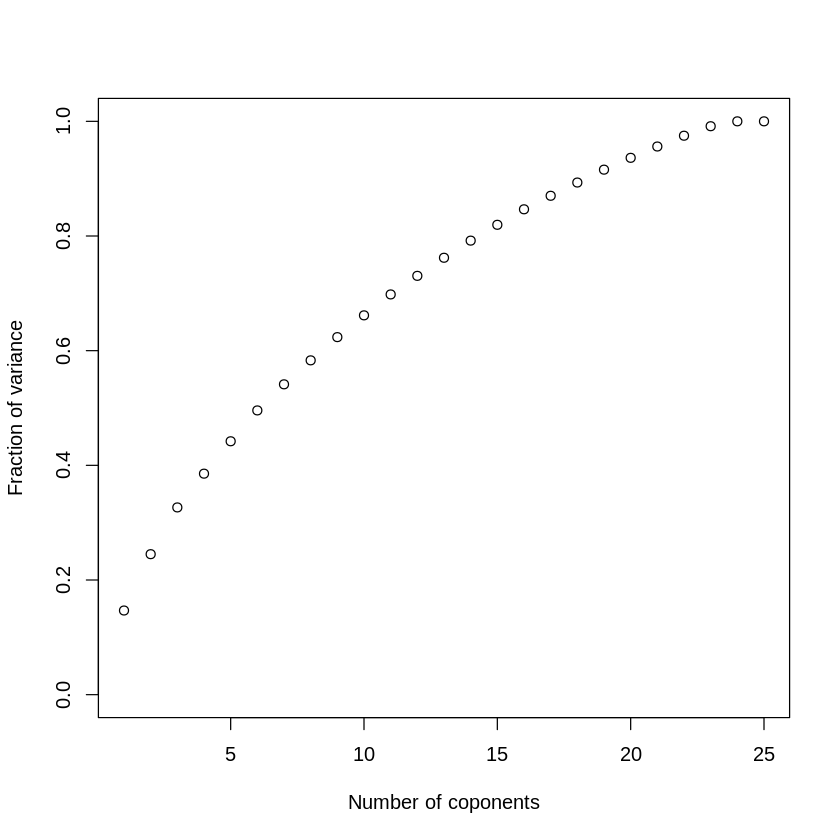

In [14]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [15]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

Warning message in summary.lm(lm(fmla, data = data2)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data2)):
"essentially perfect fit: summary may be unreliable"

In [16]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,25,0.62
Latitude,13,0.61
SqftCate,7,0.42
EnergyC,14,0.39
OwnRent,6,0.36
Income,11,0.29
SubNorm,21,0.27
HouseholdS,8,0.26
MC,18,0.25
Age,4,0.24
HabitG,23,0.21


In [18]:
#fit <- factanal(data2, 2, rotation="varimax")
#print(fit, digits=2, cutoff=.3, sort=TRUE)

In [7]:
#Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, Attitude, PBC, SubNorm

IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'PBC', 
              'SubNorm','Attitude')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [16]:
#the regression for IncHomeS
data2 = data1[,which(names(data1) %in% c("IncHomeS", IndepPred)) ]
print(dim(data2))
data2 = na.omit(data2)
print(dim(data2))
print(dim(s1))
write.csv(data2,"dr2")
names(s1) = c("ID","IncHomeS","Age","Income","Educ","OwnRent","SqftCate","Attitude",
              "SubNorm","PBC","EnergyC","MC","ComfNS","HabitC")
nn = c("IncHomeS","Age","OwnRent","SqftCate","Income","Educ","EnergyC","Attitude","PBC","MC","ComfNS","SubNorm","HabitC");
write.csv(s1[,nn],"s1")
mod = lm(fmla,data=data2)
summary(mod)
table(data2[,""])

[1] 662  13
[1] 644  13
[1] 640  14



Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.956 -1.155 -0.176  1.019  4.949 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.639812   0.670405    5.43  8.1e-08 ***
Age          0.023648   0.006537    3.62  0.00032 ***
Income      -0.024005   0.038944   -0.62  0.53786    
Educ         0.026215   0.064270    0.41  0.68349    
OwnRent      0.095533   0.154278    0.62  0.53599    
SqftCate    -0.055615   0.071911   -0.77  0.43958    
EnergyC      0.000595   0.059358    0.01  0.99201    
MC          -0.032201   0.070124   -0.46  0.64625    
ComfNS       0.327659   0.047959    6.83  2.0e-11 ***
HabitC      -0.092380   0.051202   -1.80  0.07167 .  
PBC         -0.100955   0.076439   -1.32  0.18707    
SubNorm      0.028666   0.055594    0.52  0.60629    
Attitude    -0.146710   0.079629   -1.84  0.06588 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 631 d

In [40]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.6e+01,46.109,15.861,7.6e-05
Income,1,5.1e-01,0.506,0.174,6.8e-01
Educ,1,1.4e+00,1.427,0.491,4.8e-01
OwnRent,1,5.2e-02,0.052,0.018,8.9e-01
SqftCate,1,1.5e+00,1.467,0.505,4.8e-01
EnergyC,1,2.1e+01,20.594,7.084,8.0e-03
MC,1,1.0e+01,10.024,3.448,6.4e-02
ComfNS,1,1.5e+02,154.654,53.200,9.1e-13
HabitC,1,1.3e+01,12.807,4.406,3.6e-02
PBC,1,7.1e+00,7.149,2.459,1.2e-01


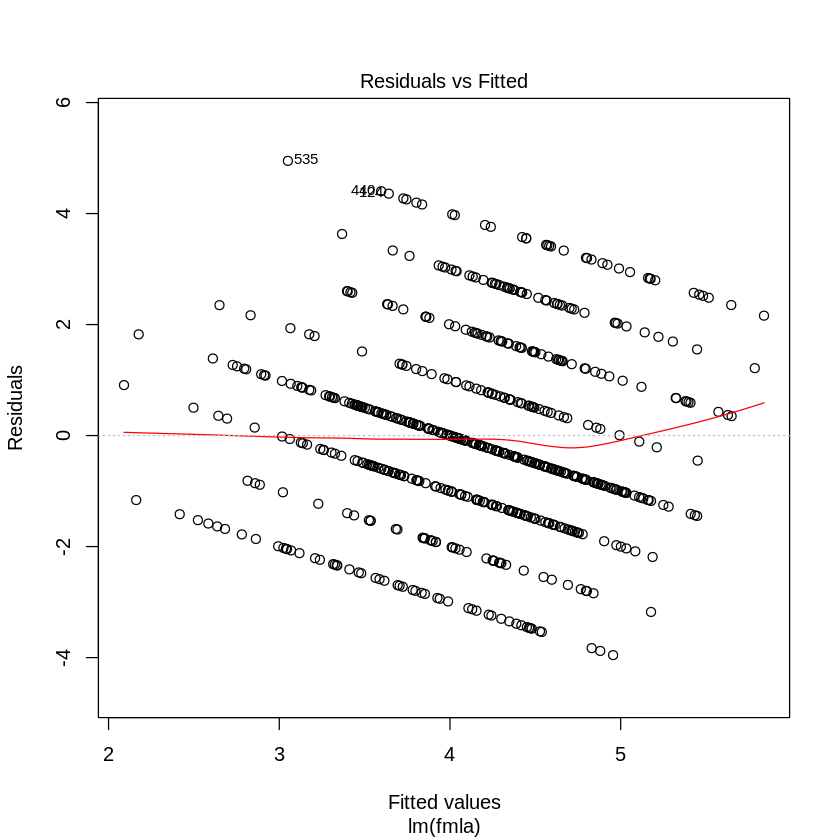

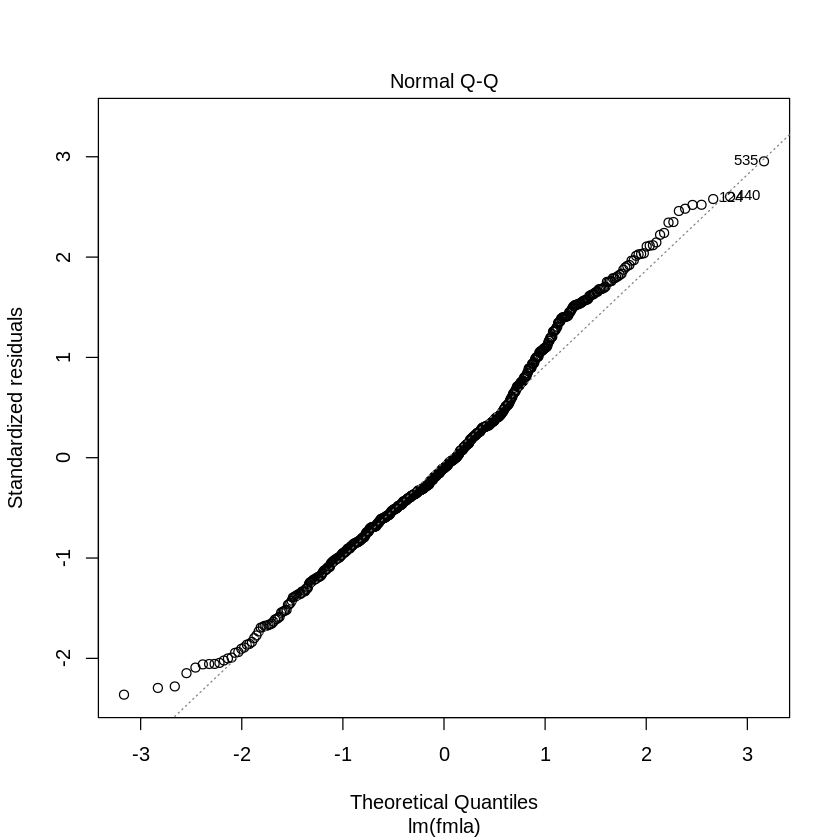

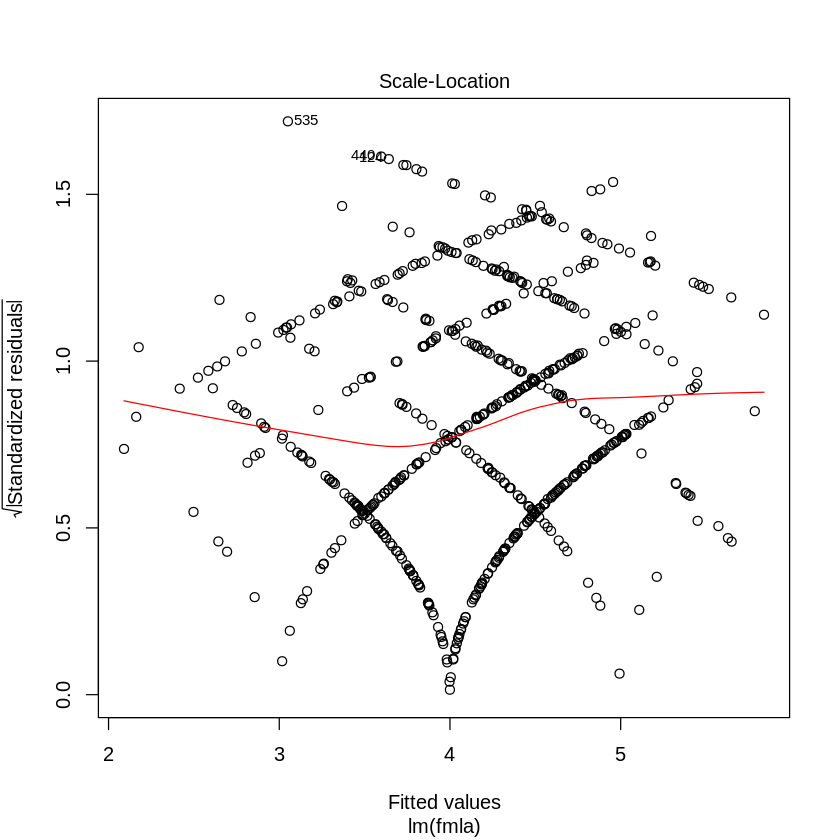

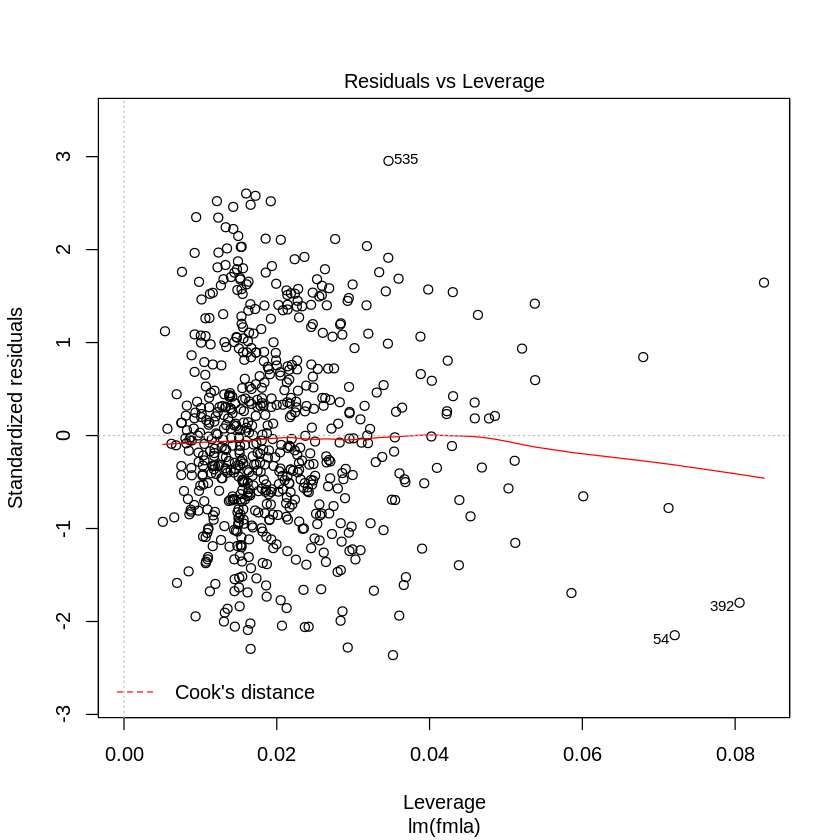

In [41]:
plot(mod)

In [22]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-3.811 -1.101 -0.214  0.955  4.654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.41589    0.94898    4.65  4.8e-06 ***
Age          0.02627    0.00976    2.69   0.0075 ** 
Income       0.02390    0.05433    0.44   0.6603    
Educ        -0.01857    0.09181   -0.20   0.8398    
OwnRent      0.03158    0.22642    0.14   0.8892    
SqftCate    -0.09719    0.10230   -0.95   0.3428    
EnergyC     -0.02278    0.08316   -0.27   0.7844    
MC          -0.00815    0.10149   -0.08   0.9361    
ComfNS       0.35308    0.07068    5.00  9.8e-07 ***
HabitC      -0.06848    0.07547   -0.91   0.3649    
PBC         -0.18842    0.10898   -1.73   0.0848 .  
SubNorm      0.01005    0.08146    0.12   0.9019    
Attitude    -0.21946    0.11759   -1.87   0.0629 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stan

In [23]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,3.5e+01,3.5e+01,1.2e+01,5.7e-04
Income,1,3.5e-04,3.5e-04,1.2e-04,9.9e-01
Educ,1,3.9e+00,3.9e+00,1.4e+00,2.4e-01
OwnRent,1,1.1e+00,1.1e+00,3.8e-01,5.4e-01
SqftCate,1,8.3e-01,8.3e-01,2.9e-01,5.9e-01
EnergyC,1,2.2e+01,2.2e+01,7.6e+00,6.3e-03
MC,1,6.8e+00,6.8e+00,2.4e+00,1.3e-01
ComfNS,1,6.8e+01,6.8e+01,2.4e+01,1.9e-06
HabitC,1,6.1e+00,6.1e+00,2.1e+00,1.5e-01
PBC,1,1.1e+01,1.1e+01,3.9e+00,5.0e-02


In [25]:
library(car)
vif(mod)

Age   Income     Educ  OwnRent SqftCate  EnergyC       MC   ComfNS 
     1.3      1.4      1.2      1.5      1.5      1.6      1.3      1.1 
  HabitC      PBC  SubNorm Attitude 
     1.2      1.2      1.3      1.8

In [ ]:
#added CashYN to model
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'PBC', 'SubNorm','Attitude', 'CashYN')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [ ]:
mod = lm(fmla,data=data2)
summary(mod)

In [ ]:
anova(mod)

In [ ]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)

In [ ]:
anova(mod)